In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette('husl')

# Load data
df = pd.read_csv('../data/patient_medications.csv')
df['LastTaken'] = pd.to_datetime(df['LastTaken'])
df['NextDose'] = pd.to_datetime(df['NextDose'], errors='coerce')
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (14, 15)


,PatientID,Name,Age,PrimaryCondition,Medication,Dosage,Frequency,TimeOfDay,StartDate,EndDate,AdherenceRate,LastTaken,NextDose,SideEffects,DrugInteractions
0,1,John Smith,65,Diabetes,Metformin,500mg,Twice Daily,Morning/Evening,2024-01-01,2024-12-31,85,2024-07-20 08:00:00,2024-07-20 20:00:00,NaN,NaN
1,1,John Smith,65,Diabetes,Insulin Glargine,10 units,Once Daily,Evening,2024-01-01,2024-12-31,92,2024-07-19 20:00:00,2024-07-20 20:00:00,NaN,NaN
2,2,Sarah Johnson,72,Hypertension,Lisinopril,10mg,Once Daily,Morning,2024-01-15,2024-12-31,78,2024-07-19 08:00:00,2024-07-20 08:00:00,Dry cough,NaN
3,2,Sarah Johnson,72,Hypertension,Metoprolol,25mg,Twice Daily,Morning/Evening,2024-01-15,2024-12-31,82,2024-07-20 08:00:00,2024-07-20 20:00:00,Fatigue,NaN
4,3,Michael Brown,58,Asthma,Albuterol,2 puffs,As Needed,Variable,2024-02-01,2024-12-31,95,2024-07-20 14:00:00,NaT,NaN,NaN


Overall Adherence Statistics:
Average Adherence Rate: 86.1%
Median Adherence Rate: 87.5%
Patients with <80% adherence: 3
Total unique patients: 10
Total medications tracked: 14


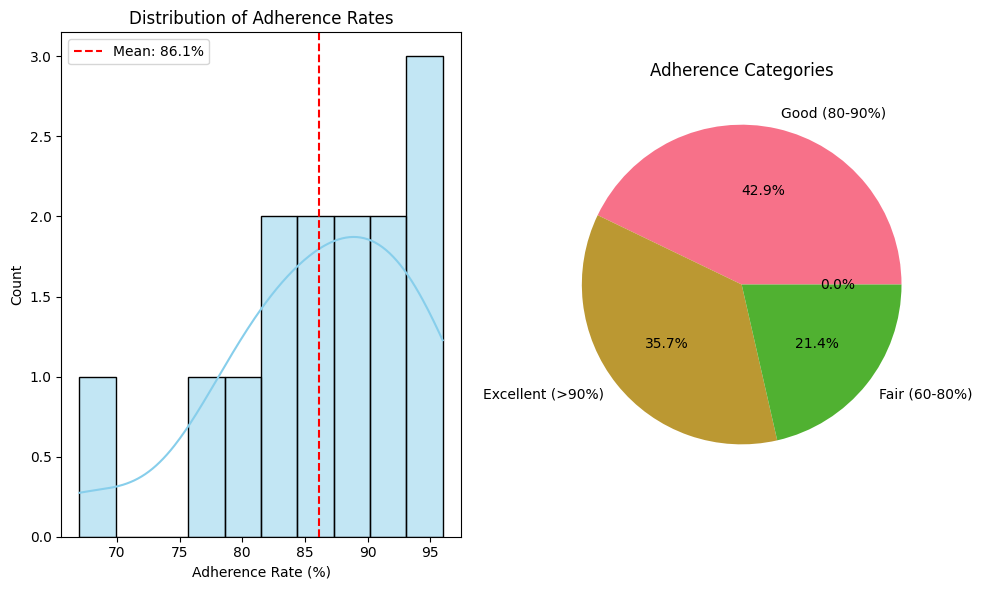

In [2]:
# Overall adherence statistics
print("Overall Adherence Statistics:")
print(f"Average Adherence Rate: {df['AdherenceRate'].mean():.1f}%")
print(f"Median Adherence Rate: {df['AdherenceRate'].median():.1f}%")
print(f"Patients with <80% adherence: {(df['AdherenceRate'] < 80).sum()}")
print(f"Total unique patients: {df['PatientID'].nunique()}")
print(f"Total medications tracked: {len(df)}")

# Adherence distribution
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
sns.histplot(df['AdherenceRate'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Adherence Rates')
plt.xlabel('Adherence Rate (%)')
plt.ylabel('Count')
plt.axvline(df['AdherenceRate'].mean(), color='red', linestyle='--', 
           label=f'Mean: {df["AdherenceRate"].mean():.1f}%')
plt.legend()

# Adherence categories
plt.subplot(1, 2, 2)
adherence_categories = pd.cut(df['AdherenceRate'], 
                            bins=[0, 60, 80, 90, 100], 
                            labels=['Poor (<60%)', 'Fair (60-80%)', 
                                   'Good (80-90%)', 'Excellent (>90%)'])
adherence_categories.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Adherence Categories')
plt.ylabel('')

plt.tight_layout()
plt.show()


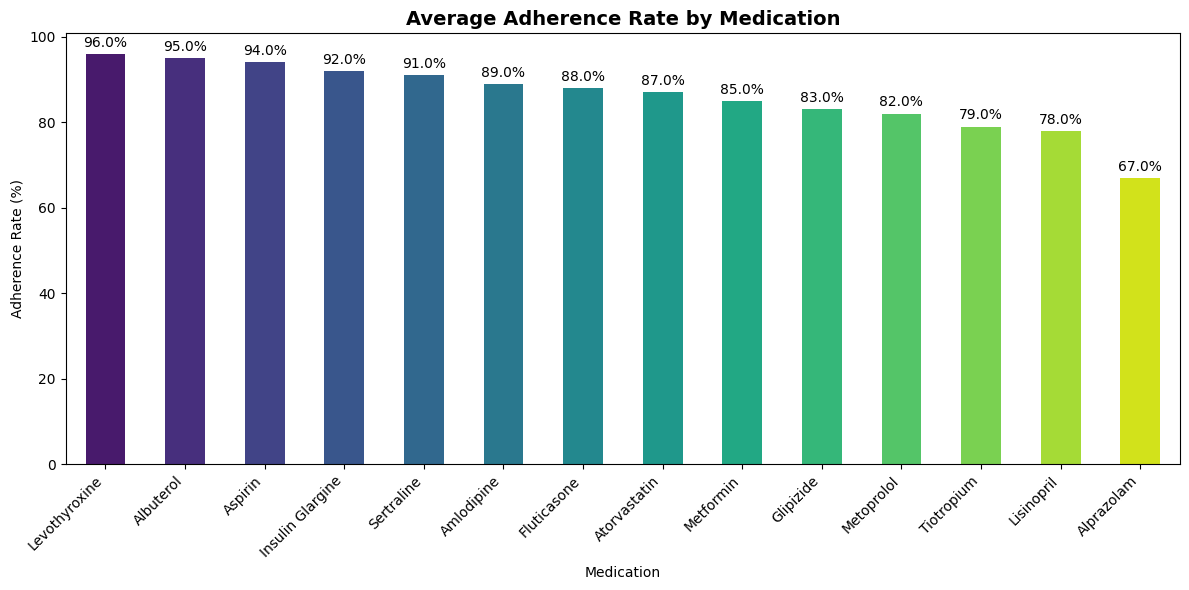


Top 5 Medications by Adherence:
                  mean  count
Medication                   
Levothyroxine     96.0      1
Albuterol         95.0      1
Aspirin           94.0      1
Insulin Glargine  92.0      1
Sertraline        91.0      1


In [3]:
# Adherence by medication type
medication_adherence = df.groupby('Medication')['AdherenceRate'].agg(['mean', 'count']).sort_values('mean', ascending=False)

plt.figure(figsize=(12,6))
colors = sns.color_palette('viridis', len(medication_adherence))
bars = medication_adherence['mean'].plot(kind='bar', color=colors)
plt.title('Average Adherence Rate by Medication', fontsize=14, fontweight='bold')
plt.ylabel('Adherence Rate (%)')
plt.xlabel('Medication')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(medication_adherence['mean']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("\nTop 5 Medications by Adherence:")
print(medication_adherence.head())


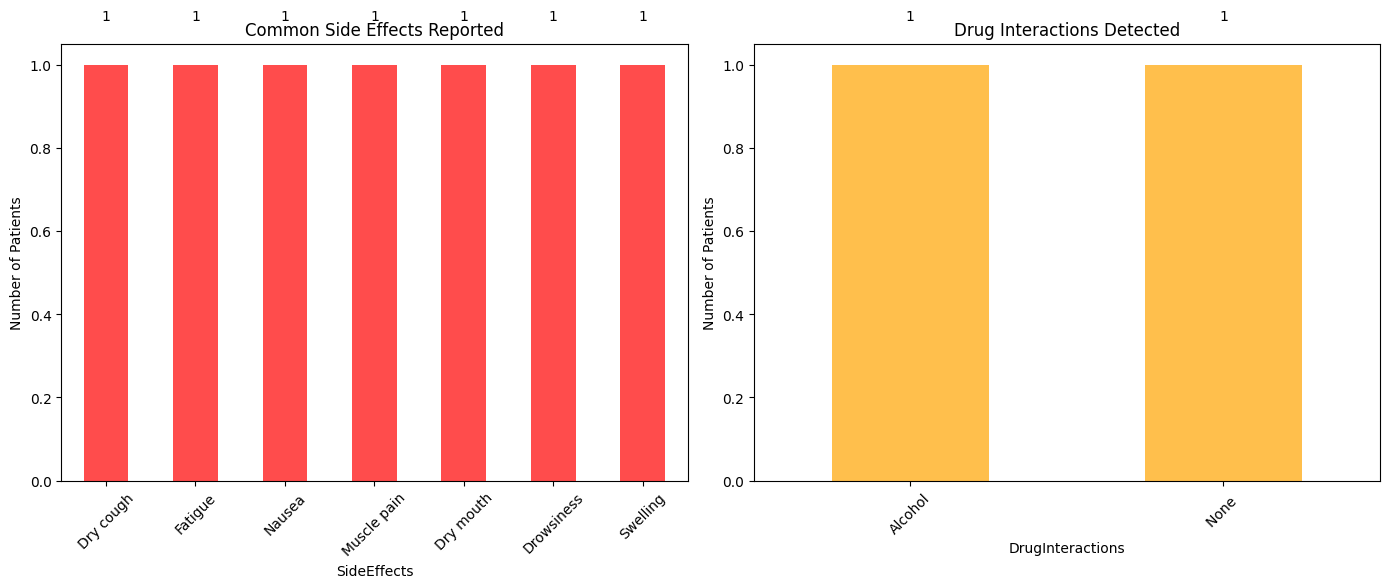


Safety Summary:
Total patients: 10
Patients with side effects: 10 (100.0%)
Patients with drug interactions: 10 (100.0%)


In [4]:
# Side effects and drug interactions
side_effects = df[df['SideEffects'] != 'None']['SideEffects'].value_counts()
drug_interactions = df[df['DrugInteractions'] != 'None']['DrugInteractions'].value_counts()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Side effects plot
if len(side_effects) > 0:
    side_effects.plot(kind='bar', ax=ax1, color='red', alpha=0.7)
    ax1.set_title('Common Side Effects Reported')
    ax1.set_ylabel('Number of Patients')
    ax1.tick_params(axis='x', rotation=45)
    
    # Add value labels
    for i, v in enumerate(side_effects.values):
        ax1.text(i, v + 0.1, str(v), ha='center', va='bottom')
else:
    ax1.text(0.5, 0.5, 'No Side Effects Reported', ha='center', va='center', 
             transform=ax1.transAxes, fontsize=12)
    ax1.set_title('Side Effects')

# Drug interactions plot
if len(drug_interactions) > 0:
    drug_interactions.plot(kind='bar', ax=ax2, color='orange', alpha=0.7)
    ax2.set_title('Drug Interactions Detected')
    ax2.set_ylabel('Number of Patients')
    ax2.tick_params(axis='x', rotation=45)
    
    # Add value labels
    for i, v in enumerate(drug_interactions.values):
        ax2.text(i, v + 0.1, str(v), ha='center', va='bottom')
else:
    ax2.text(0.5, 0.5, 'No Drug Interactions Found', ha='center', va='center', 
             transform=ax2.transAxes, fontsize=12)
    ax2.set_title('Drug Interactions')

plt.tight_layout()
plt.show()

# Safety summary
total_patients = df['PatientID'].nunique()
patients_with_side_effects = df[df['SideEffects'] != 'None']['PatientID'].nunique()
patients_with_interactions = df[df['DrugInteractions'] != 'None']['PatientID'].nunique()

print(f"\nSafety Summary:")
print(f"Total patients: {total_patients}")
print(f"Patients with side effects: {patients_with_side_effects} ({patients_with_side_effects/total_patients*100:.1f}%)")
print(f"Patients with drug interactions: {patients_with_interactions} ({patients_with_interactions/total_patients*100:.1f}%)")
